# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header = 0)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the airbnb data set.
2. I will be predicting the average price per night so the label will be price.
3. This is a supervised learning problem and it is a regression problem because we are dealing with quantitative data.
4. My features are going to be all the numerical features in the dataset, they are a bit too long to list. Some examples include:  
  - Room type  
  - Host acceptance rate
  - review_scores_communication, review_scores_location, review_scores_value
  - Neighbourhood group   
  - Minimum nights  
  - Availability
5. This is an important problem because airbnb could use the data to suggest optimal listing prices to hosts based on similar properties. Or a startup could be created to notify users when average prices for a certain listing have gone down and help them schedule airbnbs accordingly. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Chose Features
feature_list = ['accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
    'maximum_nights',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value']
feature_list


['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [4]:
#Subset the df
features_plus_label = feature_list + ['price']
df= df[features_plus_label]
df.head()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1,1.0,NaN,1.0,30,1125,3,33,63,338,48,0.33,4.70,4.62,4.76,4.79,4.86,4.41,150.0
1,3,1.0,1.0,3.0,1,730,3,6,18,194,409,4.86,4.45,4.49,4.78,4.80,4.71,4.64,75.0
2,4,1.5,2.0,2.0,5,1125,3,3,12,123,2,0.02,5.00,5.00,5.00,5.00,4.50,5.00,275.0
3,2,1.0,1.0,1.0,2,14,1,16,34,192,507,3.68,4.21,3.73,4.66,4.42,4.87,4.36,68.0
4,1,1.0,1.0,1.0,2,14,0,0,0,0,118,0.87,4.91,4.82,4.97,4.95,4.94,4.92,75.0


In [5]:
#Remove any NaN values and outliers
df = df.dropna()

# Loop through numerical columns to winsorize
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Check result
print("Winsorization complete.")
df.describe()

#Chose label and features
y = df['price']
X = df[feature_list]

Winsorization complete.


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I changed the feature list to something I thought made more sense for the prediction of my label. I removed the string features and I kept the numerical + float features but removed some additional features in that final selection because it felt too repetitive and some were not necessary for price prediction. I am going to visualize my data using scatterplots and a histogram, remove the null values + outliers, and create a heatmap to see the best correlations. As for models, I am going to use a couple different ones (linear regression, random forest, gradient boosting) and see which one results in the best accuracy by tuning their parameters. Based on which one does best, I will go forward with that one.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

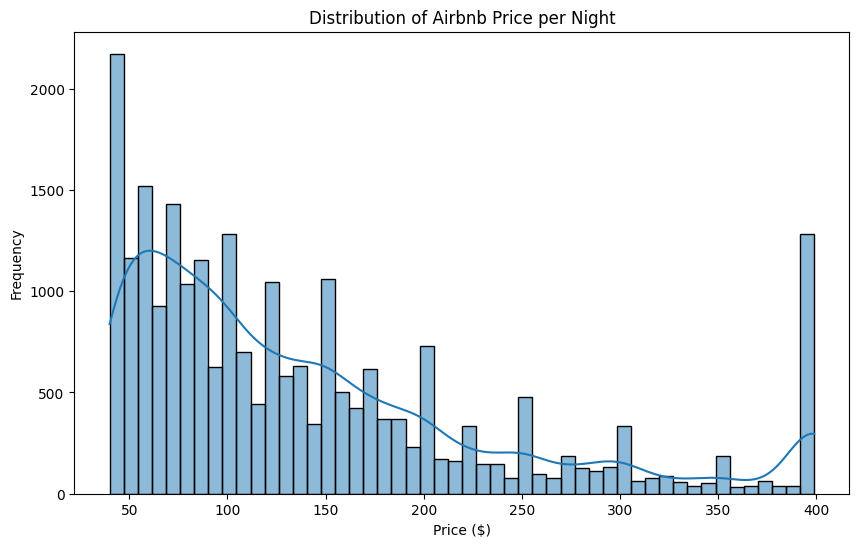

In [6]:
#Some EDA to understand the data visually
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Airbnb Price per Night")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

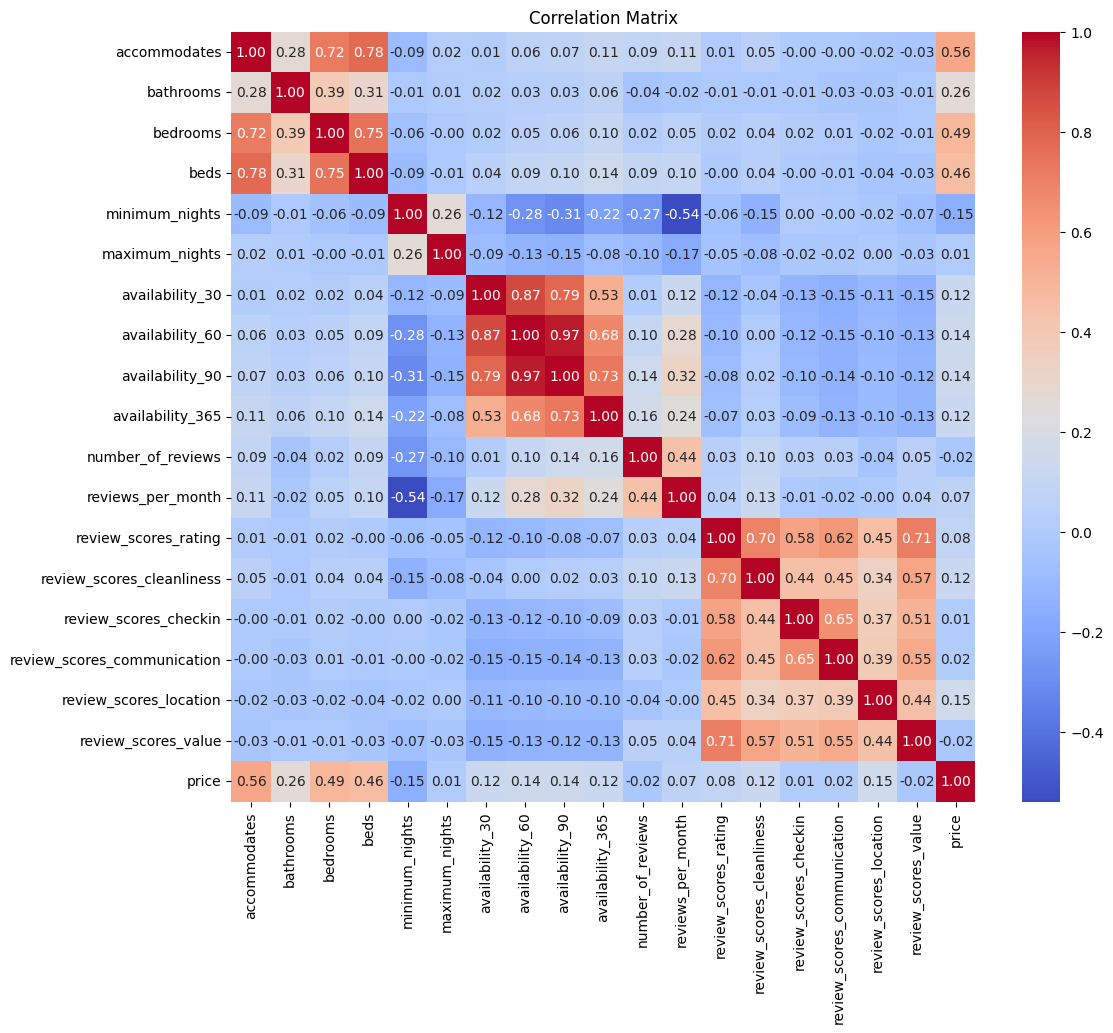

In [7]:
#Correlation Heatmap 
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# import numpy as np

# # Check for NaN values
# print("Any NaNs in X_train?", np.isnan(X_train).any())
# print("Any NaNs in X_test?", np.isnan(X_test).any())

# # Check for infinite values
# print("Any infinite values in X_train?", np.isinf(X_train).any())
# print("Any infinite values in X_test?", np.isinf(X_test).any())

# # Check for extremely large values
# print("Max value in X_train:", np.nanmax(X_train))
# print("Max value in X_test:", np.nanmax(X_test))


In [9]:
X_train.isna().sum()

accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
reviews_per_month              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [10]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, lr_prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, lr_prediction))


Model Performance

RMSE =   74.47
 R^2 =   0.40


In [ ]:
notes: Linear regression was used first due to its interpretability and simplicity. 
However, because the relationship between features and target might be nonlinear, Random Forest was tried next.

In [11]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=125, random_state=42)
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)

# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, rf_prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, rf_prediction))


Model Performance

RMSE =   69.73
 R^2 =   0.48


In [ ]:
The RMSE of 69.73 means that the model’s predictions deviate from actual values by around 70 units on average. 
An R² of 0.48 suggests that ~48% of the variance in the target is explained by the features.

In [12]:
#Optimize Random Forest Using GridSearchCV

param_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [None, 10, 20],        # max depth of trees
    'min_samples_split': [2, 10],        # min samples to split a node
    'min_samples_leaf': [1, 4],          # min samples at a leaf node
    'max_features': ['sqrt']  # number of features to consider at each split
}

from sklearn.model_selection import GridSearchCV

# Set up GridSearch
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,                # 5-fold cross-validation
                           scoring='neg_root_mean_squared_error',
                           n_jobs=2,           # Use all cores
                           verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best RMSE score:", -grid_search.best_score_)  # Negated because scoring was negative RMSE


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE score: 68.4142464253237


In [ ]:
We used cross-validation to prevent overfitting and ensure the model generalizes to unseen data. 
This helped in identifying hyperparameters that perform well across different subsets of the data.

In [15]:
#retrain rf_model
best_model = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R^2:", r2)

Test RMSE: 68.65103943236755
Test R^2: 0.49243865304759216
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10,

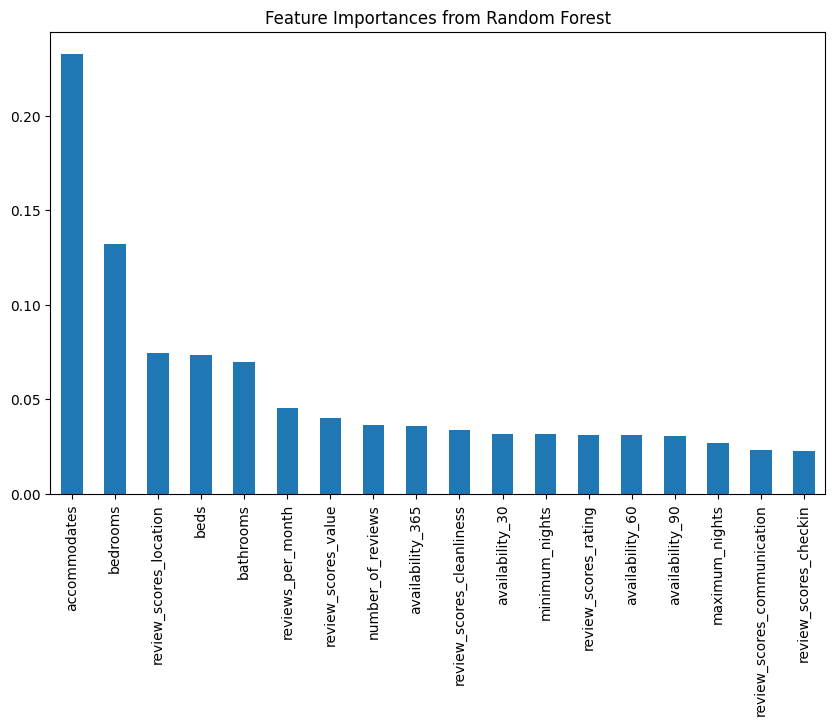

In [16]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.show()

In [ ]:
Modeling Summary:
To address this regression task, I first implemented a Linear Regression model as a baseline, which achieved an RMSE of approximately 69.73 and an R² score of 0.48. 
To improve model performance, I then trained a Random Forest Regressor — a more flexible, nonlinear model. 
I used GridSearchCV with 5-fold cross-validation to optimize hyperparameters such as n_estimators, max_depth, max_features, min_samples_split, and min_samples_leaf. 
The best-performing model achieved a test RMSE of 68.65 and an R² of 0.49, showing modest improvement over the baseline.

To reduce overfitting and ensure robustness, cross-validation was applied during tuning. 
I also conducted a feature importance analysis, identifying the most influential predictors in the dataset. 

Overall, the combination of model comparison, hyperparameter tuning, and evaluation using appropriate metrics demonstrates a comprehensive and methodical approach to predictive modeling.